In [1]:
pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp92l9m580
  JVM stdout: /tmp/tmp92l9m580/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp92l9m580/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_tda3ku
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
df = h2o.import_file('LoanApplyData-bank.csv')
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.describe()

Rows:4521
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,19.0,,,,,-3313.0,,,,1.0,,4.0,1.0,-1.0,0.0,,
mean,41.17009511170097,,,,,1422.6578190665778,,,,15.915284229152835,,263.96129174961294,2.793629727936298,39.76664454766646,0.5425790754257911,,
maxs,87.0,,,,,71188.0,,,,31.0,,3025.0,50.0,871.0,25.0,,
sigma,10.57621095871126,,,,,3009.638142467341,,,,8.247667327229928,,259.8566326246821,3.109806660188576,100.12112444301664,1.6935623506071227,,
zeros,0,,,,,357,,,,0,,0,0,0,3705,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no


In [0]:
x=df.columns
y='target'
x.remove(y)

In [0]:
train, test, validate = df.split_frame(ratios=[.75, .125])

In [8]:
aml = H2OAutoML(max_models = 20, seed = 42)
aml.train(x = x, y = y, training_frame = train, validation_frame = validate)

AutoML progress: |
19:48:31.502: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200529_194831_model_1,0.910929,0.258911,0.508175,0.179133,0.277449,0.0769777
StackedEnsemble_AllModels_AutoML_20200529_194831,0.910714,0.241517,0.511095,0.221259,0.269898,0.072845
StackedEnsemble_BestOfFamily_AutoML_20200529_194831,0.909621,0.241458,0.513282,0.229559,0.270076,0.0729408
GBM_2_AutoML_20200529_194831,0.909212,0.23053,0.510732,0.20203,0.26789,0.0717649
GBM_1_AutoML_20200529_194831,0.906038,0.236945,0.496398,0.211518,0.271463,0.0736921
GBM_5_AutoML_20200529_194831,0.902822,0.227899,0.479051,0.194744,0.266921,0.0712467
DeepLearning_grid__2_AutoML_20200529_194831_model_1,0.901591,0.238642,0.496804,0.218637,0.26984,0.0728134
GBM_grid__1_AutoML_20200529_194831_model_2,0.900978,0.238499,0.505997,0.221791,0.271138,0.073516
GBM_4_AutoML_20200529_194831,0.900813,0.24298,0.487954,0.210893,0.273794,0.0749632
XGBoost_3_AutoML_20200529_194831,0.900522,0.23438,0.50533,0.201059,0.269051,0.0723885


In [10]:
aml.modeling_steps

[{'name': 'XGBoost',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10}]},
 {'name': 'GLM', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'GBM',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10},
   {'id': 'def_4', 'weight': 10},
   {'id': 'def_5', 'weight': 10}]},
 {'name': 'DeepLearning', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'XRT', 'weight': 10}]},
 {'name': 'XGBoost', 'steps': [{'id': 'grid_1', 'weight': 100}]},
 {'name': 'GBM', 'steps': [{'id': 'grid_1', 'weight': 60}]},
 {'name': 'DeepLearning',
  'steps': [{'id': 'grid_1', 'weight': 20}, {'id': 'grid_2', 'weight': 20}]},
 {'name': 'StackedEnsemble',
  'steps': [{'id': 'best', 'weight': 10}, {'id': 'all', 'weight': 10}]}]

In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [0]:
xgb = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [16]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200529_194831_model_1


Model Summary: 


,,number_of_trees
0,,34.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0009359921685732278
RMSE: 0.030593989092193057
LogLoss: 0.015509689977041904
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7502912282943726: 


,,no,yes,Error,Rate
0,no,2994.0,0.0,0.0,(0.0/2994.0)
1,yes,0.0,376.0,0.0,(0.0/376.0)
2,Total,2994.0,376.0,0.0,(0.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.750291,1.00000,170.0
1,max f2,0.750291,1.00000,170.0
2,max f0point5,0.750291,1.00000,170.0
3,max accuracy,0.750291,1.00000,170.0
4,max precision,0.994545,1.00000,0.0
5,max recall,0.750291,1.00000,170.0
6,max specificity,0.994545,1.00000,0.0
7,max absolute_mcc,0.750291,1.00000,170.0
8,max min_per_class_accuracy,0.750291,1.00000,170.0
9,max mean_per_class_accuracy,0.750291,1.00000,170.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.976385,8.962766,8.962766,1.000000,0.983328,1.000000,0.983328,0.090426,0.090426,796.276596,796.276596
1,,2,0.020178,0.967651,8.962766,8.962766,1.000000,0.972456,1.000000,0.977892,0.090426,0.180851,796.276596,796.276596
2,,3,0.030267,0.959869,8.962766,8.962766,1.000000,0.963024,1.000000,0.972936,0.090426,0.271277,796.276596,796.276596
3,,4,0.040059,0.951986,8.962766,8.962766,1.000000,0.956379,1.000000,0.968889,0.087766,0.359043,796.276596,796.276596
4,,5,0.050148,0.943864,8.962766,8.962766,1.000000,0.948256,1.000000,0.964738,0.090426,0.449468,796.276596,796.276596
5,,6,0.100000,0.878849,8.962766,8.962766,1.000000,0.920958,1.000000,0.942913,0.446809,0.896277,796.276596,796.276596
6,,7,0.150148,0.045313,2.068331,6.660079,0.230769,0.243560,0.743083,0.709335,0.103723,1.000000,106.833061,566.007905
7,,8,0.200000,0.026145,0.000000,5.000000,0.000000,0.034528,0.557864,0.541134,0.000000,1.000000,-100.000000,400.000000
8,,9,0.300000,0.010638,0.000000,3.333333,0.000000,0.016982,0.371909,0.366416,0.000000,1.000000,-100.000000,233.333333
9,,10,0.400000,0.004959,0.000000,2.500000,0.000000,0.007442,0.278932,0.276673,0.000000,1.000000,-100.000000,150.000000




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.0915307248421185
RMSE: 0.3025404515798152
LogLoss: 0.3129204798037117
Mean Per-Class Error: 0.17229038854805723
AUC: 0.8739542665923035
AUCPR: 0.42841647806778926
Gini: 0.7479085331846069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10149354487657547: 


,,no,yes,Error,Rate
0,no,441.0,48.0,0.0982,(48.0/489.0)
1,yes,22.0,44.0,0.3333,(22.0/66.0)
2,Total,463.0,92.0,0.1261,(70.0/555.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.101494,0.556962,91.0
1,max f2,0.038729,0.677340,141.0
2,max f0point5,0.253336,0.510204,56.0
3,max accuracy,0.253336,0.886486,56.0
4,max precision,0.957813,1.000000,0.0
5,max recall,0.001018,1.000000,357.0
6,max specificity,0.957813,1.000000,0.0
7,max absolute_mcc,0.101494,0.494855,91.0
8,max min_per_class_accuracy,0.038729,0.822086,141.0
9,max mean_per_class_accuracy,0.038729,0.827710,141.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score:  7.67 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,0.839745,4.204545,4.204545,0.500000,0.880801,0.500000,0.880801,0.045455,0.045455,320.454545,320.454545
1,,2,0.021622,0.787722,2.803030,3.503788,0.333333,0.809185,0.416667,0.844993,0.030303,0.075758,180.303030,250.378788
2,,3,0.030631,0.704006,5.045455,3.957219,0.600000,0.734197,0.470588,0.812406,0.045455,0.121212,404.545455,295.721925
3,,4,0.041441,0.612187,2.803030,3.656126,0.333333,0.668558,0.434783,0.774880,0.030303,0.151515,180.303030,265.612648
4,,5,0.050450,0.516947,3.363636,3.603896,0.400000,0.563858,0.428571,0.737198,0.030303,0.181818,236.363636,260.389610
5,,6,0.100901,0.257790,5.105519,4.354708,0.607143,0.366648,0.517857,0.551923,0.257576,0.439394,410.551948,335.470779
6,,7,0.151351,0.127995,3.303571,4.004329,0.392857,0.188084,0.476190,0.430643,0.166667,0.606061,230.357143,300.432900
7,,8,0.200000,0.071046,1.868687,3.484848,0.222222,0.092983,0.414414,0.348510,0.090909,0.696970,86.868687,248.484848
8,,9,0.300901,0.020826,1.501623,2.819815,0.178571,0.042212,0.335329,0.245799,0.151515,0.848485,50.162338,181.981492
9,,10,0.400000,0.009366,0.764463,2.310606,0.090909,0.014032,0.274775,0.188379,0.075758,0.924242,-23.553719,131.060606




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.07697768891978886
RMSE: 0.27744853382166007
LogLoss: 0.2589113345894642
Mean Per-Class Error: 0.14709560965903434
AUC: 0.9109291277590642
AUCPR: 0.5081750273555491
Gini: 0.8218582555181284

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07105620056390763: 


,,no,yes,Error,Rate
0,no,2638.0,356.0,0.1189,(356.0/2994.0)
1,yes,90.0,286.0,0.2394,(90.0/376.0)
2,Total,2728.0,642.0,0.1323,(446.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.071056,0.561886,300.0
1,max f2,0.030614,0.695616,338.0
2,max f0point5,0.391480,0.524733,162.0
3,max accuracy,0.627301,0.901187,103.0
4,max precision,0.980641,1.000000,0.0
5,max recall,0.001448,1.000000,392.0
6,max specificity,0.980641,1.000000,0.0
7,max absolute_mcc,0.071056,0.514500,300.0
8,max min_per_class_accuracy,0.040504,0.839345,328.0
9,max mean_per_class_accuracy,0.021676,0.852904,348.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score:  8.48 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.916578,5.272215,5.272215,0.588235,0.950766,0.588235,0.950766,0.053191,0.053191,427.221527,427.221527
1,,2,0.020178,0.855383,5.799437,5.535826,0.647059,0.886581,0.617647,0.918674,0.058511,0.111702,479.943680,453.582603
2,,3,0.030267,0.793153,6.853880,5.975177,0.764706,0.823636,0.666667,0.886994,0.069149,0.180851,585.387985,497.517730
3,,4,0.040059,0.715712,4.617182,5.643223,0.515152,0.757470,0.629630,0.855333,0.045213,0.226064,361.718246,464.322301
4,,5,0.050148,0.641225,4.744994,5.462514,0.529412,0.678656,0.609467,0.819789,0.047872,0.273936,374.499374,446.251416
5,,6,0.100000,0.296577,3.894535,4.680851,0.434524,0.460902,0.522255,0.640878,0.194149,0.468085,289.453521,368.085106
6,,7,0.150148,0.133854,3.288115,4.215688,0.366864,0.206932,0.470356,0.495943,0.164894,0.632979,228.811532,321.568834
7,,8,0.200000,0.062221,2.880889,3.882979,0.321429,0.091356,0.433234,0.395097,0.143617,0.776596,188.088906,288.297872
8,,9,0.300000,0.018005,1.462766,3.076241,0.163205,0.035641,0.343225,0.275278,0.146277,0.922872,46.276596,207.624113
9,,10,0.400000,0.006836,0.398936,2.406915,0.044510,0.010913,0.268546,0.209187,0.039894,0.962766,-60.106383,140.691489




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.87240356,0.011540319,0.88724035,0.85905045,0.8635015,0.87982196,0.87240356
1,auc,0.91148865,0.00389926,0.9134365,0.91493326,0.91430175,0.9060482,0.90872365
2,aucpr,0.5061596,0.06037766,0.41760397,0.55872107,0.49583635,0.5667203,0.4919163
3,err,0.12759644,0.011540319,0.11275964,0.14094956,0.13649851,0.120178044,0.12759644
4,err_count,86.0,7.7781744,76.0,95.0,92.0,81.0,86.0
5,f0point5,0.49377054,0.05398325,0.4594017,0.5212922,0.46434495,0.57591623,0.4478976
6,f1,0.5662734,0.040689215,0.5308642,0.59915614,0.54901963,0.6197183,0.5326087
7,f2,0.6664102,0.027394759,0.62865496,0.7043651,0.67146283,0.6707317,0.65683645
8,lift_top_group,5.2605586,1.5782231,4.8142858,3.245586,5.424547,5.1766515,7.641723
9,logloss,0.25891134,0.038697995,0.22721262,0.28828382,0.24166566,0.3113215,0.22607309



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-29 19:49:51,6.138 sec,0.0,0.500000,0.693147,0.500000,0.111573,1.000000,0.888427,0.500000,0.693147,0.500000,0.118919,1.000000,0.881081
1,,2020-05-29 19:49:51,6.337 sec,5.0,0.179731,0.177156,0.982866,0.965576,8.962766,0.010979,0.298259,0.311128,0.874373,0.416517,5.606061,0.151351
2,,2020-05-29 19:49:52,6.471 sec,10.0,0.097112,0.070492,0.999873,0.999136,8.962766,0.001484,0.290326,0.271681,0.878819,0.435506,5.606061,0.135135
3,,2020-05-29 19:49:52,6.612 sec,15.0,0.063285,0.037539,1.000000,1.000000,8.962766,0.000000,0.296993,0.283610,0.871057,0.404804,1.401515,0.113514
4,,2020-05-29 19:49:52,6.760 sec,20.0,0.048131,0.026591,1.000000,1.000000,8.962766,0.000000,0.297715,0.291865,0.872095,0.419338,1.401515,0.126126
5,,2020-05-29 19:49:52,6.915 sec,25.0,0.038383,0.020340,1.000000,1.000000,8.962766,0.000000,0.299568,0.300210,0.874171,0.419238,1.401515,0.120721
6,,2020-05-29 19:49:52,7.098 sec,30.0,0.033677,0.017334,1.000000,1.000000,8.962766,0.000000,0.301486,0.308665,0.874342,0.421691,2.803030,0.149550
7,,2020-05-29 19:49:52,7.245 sec,34.0,0.030594,0.015510,1.000000,1.000000,8.962766,0.000000,0.302540,0.312920,0.873954,0.428416,4.204545,0.126126



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,1006.022827,1.000000,0.314272
1,day,295.845795,0.294075,0.092419
2,age,217.985580,0.216681,0.068097
3,balance,206.570129,0.205333,0.064530
4,pdays,162.693939,0.161720,0.050824
5,poutcome.success,158.325729,0.157378,0.049459
6,month.oct,77.070793,0.076609,0.024076
7,housing.no,69.861900,0.069444,0.021824
8,campaign,65.244110,0.064854,0.020382
9,previous,59.597813,0.059241,0.018618



See the whole table with table.as_data_frame()


In [0]:
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [19]:
se

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200529_194831

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.01480463748230407
RMSE: 0.12167430904798297
LogLoss: 0.08072269621893553
Null degrees of freedom: 3369
Residual degrees of freedom: 3362
Null deviance: 2357.5904384278792
Residual deviance: 544.0709725156255
AIC: 560.0709725156255
AUC: 0.9993324414787021
AUCPR: 0.9949386174471241
Gini: 0.9986648829574043

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3625243864396869: 


,,no,yes,Error,Rate
0,no,2983.0,11.0,0.0037,(11.0/2994.0)
1,yes,9.0,367.0,0.0239,(9.0/376.0)
2,Total,2992.0,378.0,0.0059,(20.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362524,0.973475,202.0
1,max f2,0.284127,0.975289,215.0
2,max f0point5,0.400199,0.972522,198.0
3,max accuracy,0.362524,0.994065,202.0
4,max precision,0.972561,1.000000,0.0
5,max recall,0.162797,1.000000,254.0
6,max specificity,0.972561,1.000000,0.0
7,max absolute_mcc,0.362524,0.970138,202.0
8,max min_per_class_accuracy,0.255311,0.987976,222.0
9,max mean_per_class_accuracy,0.255311,0.989999,222.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 12.43 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.936288,8.962766,8.962766,1.000000,0.948780,1.000000,0.948780,0.090426,0.090426,796.276596,796.276596
1,,2,0.020178,0.908803,8.962766,8.962766,1.000000,0.921945,1.000000,0.935363,0.090426,0.180851,796.276596,796.276596
2,,3,0.030267,0.885841,8.962766,8.962766,1.000000,0.897819,1.000000,0.922848,0.090426,0.271277,796.276596,796.276596
3,,4,0.040059,0.859412,8.962766,8.962766,1.000000,0.870972,1.000000,0.910167,0.087766,0.359043,796.276596,796.276596
4,,5,0.050148,0.829979,8.962766,8.962766,1.000000,0.843135,1.000000,0.896682,0.090426,0.449468,796.276596,796.276596
5,,6,0.100000,0.491107,8.696017,8.829787,0.970238,0.674039,0.985163,0.785691,0.433511,0.882979,769.601697,782.978723
6,,7,0.150148,0.137417,2.333501,6.660079,0.260355,0.270223,0.743083,0.613529,0.117021,1.000000,133.350120,566.007905
7,,8,0.200000,0.073268,0.000000,5.000000,0.000000,0.099086,0.557864,0.485300,0.000000,1.000000,-100.000000,400.000000
8,,9,0.300000,0.043634,0.000000,3.333333,0.000000,0.054954,0.371909,0.341851,0.000000,1.000000,-100.000000,233.333333
9,,10,0.400000,0.035398,0.000000,2.500000,0.000000,0.038869,0.278932,0.266106,0.000000,1.000000,-100.000000,150.000000




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.07889529666749333
RMSE: 0.2808830658254309
LogLoss: 0.25579082040392803
Null degrees of freedom: 554
Residual degrees of freedom: 547
Null deviance: 405.1862164370234
Residual deviance: 283.92781064836015
AIC: 299.92781064836015
AUC: 0.9008179959100204
AUCPR: 0.5208538558749112
Gini: 0.8016359918200409

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1440021642082516: 


,,no,yes,Error,Rate
0,no,438.0,51.0,0.1043,(51.0/489.0)
1,yes,14.0,52.0,0.2121,(14.0/66.0)
2,Total,452.0,103.0,0.1171,(65.0/555.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.144002,0.615385,102.0
1,max f2,0.144002,0.708447,102.0
2,max f0point5,0.144002,0.543933,102.0
3,max accuracy,0.727746,0.895495,9.0
4,max precision,0.944096,1.000000,0.0
5,max recall,0.031127,1.000000,317.0
6,max specificity,0.944096,1.000000,0.0
7,max absolute_mcc,0.144002,0.569155,102.0
8,max min_per_class_accuracy,0.108338,0.818182,122.0
9,max mean_per_class_accuracy,0.144002,0.841792,102.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,0.778223,7.007576,7.007576,0.833333,0.872158,0.833333,0.872158,0.075758,0.075758,600.757576,600.757576
1,,2,0.021622,0.712444,5.606061,6.306818,0.666667,0.740750,0.750000,0.806454,0.060606,0.136364,460.606061,530.681818
2,,3,0.030631,0.650947,1.681818,4.946524,0.200000,0.684321,0.588235,0.770532,0.015152,0.151515,68.181818,394.652406
3,,4,0.041441,0.586931,2.803030,4.387352,0.333333,0.627229,0.521739,0.733149,0.030303,0.181818,180.303030,338.735178
4,,5,0.050450,0.572187,3.363636,4.204545,0.400000,0.578926,0.500000,0.705609,0.030303,0.212121,236.363636,320.454545
5,,6,0.100901,0.317981,4.805195,4.504870,0.571429,0.446110,0.535714,0.575859,0.242424,0.454545,380.519481,350.487013
6,,7,0.151351,0.187209,3.603896,4.204545,0.428571,0.236025,0.500000,0.462581,0.181818,0.636364,260.389610,320.454545
7,,8,0.200000,0.122186,3.114478,3.939394,0.370370,0.153660,0.468468,0.387438,0.151515,0.787879,211.447811,293.939394
8,,9,0.300901,0.071652,0.900974,2.920523,0.107143,0.092341,0.347305,0.288483,0.090909,0.878788,-9.902597,192.052259
9,,10,0.400000,0.046953,0.611570,2.348485,0.072727,0.056736,0.279279,0.231068,0.060606,0.939394,-38.842975,134.848485




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07284497205414867
RMSE: 0.2698980771590429
LogLoss: 0.24151710474680693
Null degrees of freedom: 3369
Residual degrees of freedom: 3362
Null deviance: 2358.9455620824306
Residual deviance: 1627.8252859934787
AIC: 1643.8252859934787
AUC: 0.9107141588140821
AUCPR: 0.5110948985118949
Gini: 0.8214283176281643

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1945398481607654: 


,,no,yes,Error,Rate
0,no,2760.0,234.0,0.0782,(234.0/2994.0)
1,yes,137.0,239.0,0.3644,(137.0/376.0)
2,Total,2897.0,473.0,0.1101,(371.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.194540,0.563015,235.0
1,max f2,0.074201,0.698561,315.0
2,max f0point5,0.313765,0.544944,186.0
3,max accuracy,0.337622,0.899703,176.0
4,max precision,0.869230,0.724138,17.0
5,max recall,0.029308,1.000000,391.0
6,max specificity,0.947221,0.999666,0.0
7,max absolute_mcc,0.079350,0.507685,309.0
8,max min_per_class_accuracy,0.083419,0.839679,305.0
9,max mean_per_class_accuracy,0.074201,0.850653,315.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.13 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.849954,6.063048,6.063048,0.676471,0.897430,0.676471,0.897430,0.061170,0.061170,506.304756,506.304756
1,,2,0.020178,0.790125,5.799437,5.931242,0.647059,0.818884,0.661765,0.858157,0.058511,0.119681,479.943680,493.124218
2,,3,0.030267,0.724977,4.744994,5.535826,0.529412,0.760476,0.617647,0.825597,0.047872,0.167553,374.499374,453.582603
3,,4,0.040059,0.660557,4.888781,5.377660,0.545455,0.690950,0.600000,0.792683,0.047872,0.215426,388.878143,437.765957
4,,5,0.050148,0.597978,5.008605,5.303412,0.558824,0.632729,0.591716,0.760503,0.050532,0.265957,400.860451,430.341181
5,,6,0.100000,0.323159,4.588083,4.946809,0.511905,0.454090,0.551929,0.607751,0.228723,0.494681,358.808257,394.680851
6,,7,0.150148,0.174364,2.969911,4.286540,0.331361,0.238597,0.478261,0.484457,0.148936,0.643617,196.991061,328.654024
7,,8,0.200000,0.107253,2.187342,3.763298,0.244048,0.134708,0.419881,0.397279,0.109043,0.752660,118.734169,276.329787
8,,9,0.300000,0.059094,1.622340,3.049645,0.181009,0.078077,0.340257,0.290878,0.162234,0.914894,62.234043,204.964539
9,,10,0.400000,0.041999,0.505319,2.413564,0.056380,0.049031,0.269288,0.230416,0.050532,0.965426,-49.468085,141.356383


In [0]:
metalearner = h2o.get_model(se.metalearner()['name'])

In [21]:
metalearner.coef_norm()

{'DRF_1_AutoML_20200529_194831': 0.4240890158468797,
 'DeepLearning_1_AutoML_20200529_194831': 0.0,
 'DeepLearning_grid__1_AutoML_20200529_194831_model_1': 0.0,
 'DeepLearning_grid__2_AutoML_20200529_194831_model_1': 0.13968828223267024,
 'GBM_1_AutoML_20200529_194831': 0.0,
 'GBM_2_AutoML_20200529_194831': 8.356198749390065e-06,
 'GBM_3_AutoML_20200529_194831': 0.0,
 'GBM_4_AutoML_20200529_194831': 0.0,
 'GBM_5_AutoML_20200529_194831': 0.19267309306185326,
 'GBM_grid__1_AutoML_20200529_194831_model_1': 0.0,
 'GBM_grid__1_AutoML_20200529_194831_model_2': 0.0,
 'GLM_1_AutoML_20200529_194831': 0.0,
 'Intercept': -2.69520833057908,
 'XGBoost_1_AutoML_20200529_194831': 0.0,
 'XGBoost_2_AutoML_20200529_194831': 0.0,
 'XGBoost_3_AutoML_20200529_194831': 0.1325622948113654,
 'XGBoost_grid__1_AutoML_20200529_194831_model_1': 0.0,
 'XGBoost_grid__1_AutoML_20200529_194831_model_2': 0.05024563569402351,
 'XGBoost_grid__1_AutoML_20200529_194831_model_3': 0.0,
 'XGBoost_grid__1_AutoML_20200529_1948

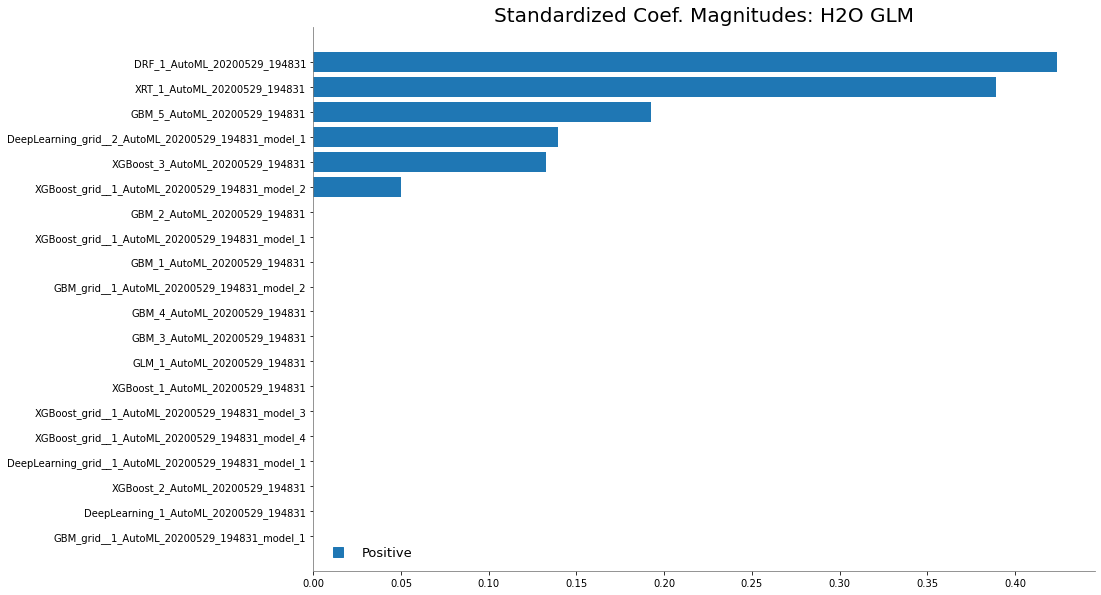

In [22]:
%matplotlib inline
metalearner.std_coef_plot()

In [0]:
gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [35]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20200529_194831


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,52.0,52.0,29936.0,7.0,7.0,7.0,24.0,65.0,41.03846




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.022940728413654413
RMSE: 0.15146197018939908
LogLoss: 0.09532290564560858
Mean Per-Class Error: 0.039145667220966684
AUC: 0.9926892792677554
AUCPR: 0.9685373273738335
Gini: 0.9853785585355108

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3881579772295486: 


,,no,yes,Error,Rate
0,no,2979.0,15.0,0.005,(15.0/2994.0)
1,yes,45.0,331.0,0.1197,(45.0/376.0)
2,Total,3024.0,346.0,0.0178,(60.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.388158,0.916898,159.0
1,max f2,0.253130,0.915893,201.0
2,max f0point5,0.448307,0.950119,148.0
3,max accuracy,0.393565,0.982196,158.0
4,max precision,0.966462,1.000000,0.0
5,max recall,0.013943,1.000000,372.0
6,max specificity,0.966462,1.000000,0.0
7,max absolute_mcc,0.388158,0.907930,159.0
8,max min_per_class_accuracy,0.202504,0.957582,222.0
9,max mean_per_class_accuracy,0.217314,0.960854,214.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.10 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.891949,8.962766,8.962766,1.000000,0.922674,1.000000,0.922674,0.090426,0.090426,796.276596,796.276596
1,,2,0.020178,0.851843,8.962766,8.962766,1.000000,0.868316,1.000000,0.895495,0.090426,0.180851,796.276596,796.276596
2,,3,0.030267,0.814938,8.962766,8.962766,1.000000,0.834073,1.000000,0.875021,0.090426,0.271277,796.276596,796.276596
3,,4,0.040059,0.788629,8.962766,8.962766,1.000000,0.802143,1.000000,0.857206,0.087766,0.359043,796.276596,796.276596
4,,5,0.050148,0.754332,8.962766,8.962766,1.000000,0.771495,1.000000,0.839963,0.090426,0.449468,796.276596,796.276596
5,,6,0.100000,0.409154,8.322568,8.643617,0.928571,0.602651,0.964392,0.721659,0.414894,0.864362,732.256839,764.361702
6,,7,0.150148,0.194353,2.015296,6.429810,0.224852,0.274715,0.717391,0.572383,0.101064,0.965426,101.529649,542.981036
7,,8,0.200000,0.112149,0.320099,4.906915,0.035714,0.148276,0.547478,0.466671,0.015957,0.981383,-67.990122,390.691489
8,,9,0.300000,0.052308,0.106383,3.306738,0.011869,0.078186,0.368942,0.337176,0.010638,0.992021,-89.361702,230.673759
9,,10,0.400000,0.024671,0.026596,2.486702,0.002967,0.035319,0.277448,0.261712,0.002660,0.994681,-97.340426,148.670213




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07676665488291269
RMSE: 0.2770679607657888
LogLoss: 0.24654229210884618
Mean Per-Class Error: 0.14175497304331652
AUC: 0.8886565036871785
AUCPR: 0.5016595146059586
Gini: 0.777313007374357

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2037376707733329: 


,,no,yes,Error,Rate
0,no,440.0,49.0,0.1002,(49.0/489.0)
1,yes,23.0,43.0,0.3485,(23.0/66.0)
2,Total,463.0,92.0,0.1297,(72.0/555.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.203738,0.544304,90.0
1,max f2,0.066452,0.712644,167.0
2,max f0point5,0.531207,0.521978,28.0
3,max accuracy,0.544230,0.897297,24.0
4,max precision,0.954152,1.000000,0.0
5,max recall,0.004665,1.000000,388.0
6,max specificity,0.954152,1.000000,0.0
7,max absolute_mcc,0.077934,0.506263,160.0
8,max min_per_class_accuracy,0.114983,0.817996,139.0
9,max mean_per_class_accuracy,0.066452,0.858245,167.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 10.27 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,0.712980,5.606061,5.606061,0.666667,0.822778,0.666667,0.822778,0.060606,0.060606,460.606061,460.606061
1,,2,0.021622,0.652796,4.204545,4.905303,0.500000,0.674508,0.583333,0.748643,0.045455,0.106061,320.454545,390.530303
2,,3,0.030631,0.602915,5.045455,4.946524,0.600000,0.627670,0.588235,0.713063,0.045455,0.151515,404.545455,394.652406
3,,4,0.041441,0.551496,7.007576,5.484190,0.833333,0.580513,0.652174,0.678485,0.075758,0.227273,600.757576,448.418972
4,,5,0.050450,0.532008,5.045455,5.405844,0.600000,0.542343,0.642857,0.654174,0.045455,0.272727,404.545455,440.584416
5,,6,0.100901,0.338044,3.603896,4.504870,0.428571,0.437328,0.535714,0.545751,0.181818,0.454545,260.389610,350.487013
6,,7,0.151351,0.224303,2.702922,3.904221,0.321429,0.278845,0.464286,0.456782,0.136364,0.590909,170.292208,290.422078
7,,8,0.200000,0.168356,2.491582,3.560606,0.296296,0.192773,0.423423,0.392564,0.121212,0.712121,149.158249,256.060606
8,,9,0.300901,0.071454,2.102273,3.071584,0.250000,0.116091,0.365269,0.299854,0.212121,0.924242,110.227273,207.158410
9,,10,0.400000,0.036636,0.305785,2.386364,0.036364,0.050514,0.283784,0.238081,0.030303,0.954545,-69.421488,138.636364




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.07176485719425876
RMSE: 0.2678896362203263
LogLoss: 0.23052951852365178
Mean Per-Class Error: 0.156948649071192
AUC: 0.9092120411034835
AUCPR: 0.5107318032050471
Gini: 0.818424082206967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1765666691832668: 


,,no,yes,Error,Rate
0,no,2692.0,302.0,0.1009,(302.0/2994.0)
1,yes,114.0,262.0,0.3032,(114.0/376.0)
2,Total,2806.0,564.0,0.1234,(416.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.176567,0.557447,238.0
1,max f2,0.054920,0.679037,314.0
2,max f0point5,0.349055,0.540304,164.0
3,max accuracy,0.461579,0.900593,125.0
4,max precision,0.972794,1.000000,0.0
5,max recall,0.008051,1.000000,385.0
6,max specificity,0.972794,1.000000,0.0
7,max absolute_mcc,0.157205,0.504654,247.0
8,max min_per_class_accuracy,0.088939,0.827128,287.0
9,max mean_per_class_accuracy,0.054920,0.843051,314.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 10.14 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,0.857929,5.799437,5.799437,0.647059,0.902630,0.647059,0.902630,0.058511,0.058511,479.943680,479.943680
1,,2,0.020178,0.784903,5.535826,5.667631,0.617647,0.819770,0.632353,0.861200,0.055851,0.114362,453.582603,466.763141
2,,3,0.030267,0.707597,5.272215,5.535826,0.588235,0.734653,0.617647,0.819018,0.053191,0.167553,427.221527,453.582603
3,,4,0.040059,0.642808,5.431979,5.510441,0.606061,0.678098,0.614815,0.784571,0.053191,0.220745,443.197937,451.044129
4,,5,0.050148,0.593507,5.272215,5.462514,0.588235,0.616523,0.609467,0.750762,0.053191,0.273936,427.221527,446.251416
5,,6,0.100000,0.343244,4.374683,4.920213,0.488095,0.463528,0.548961,0.607571,0.218085,0.492021,337.468338,392.021277
6,,7,0.150148,0.205815,2.757774,4.197975,0.307692,0.265651,0.468379,0.493373,0.138298,0.630319,175.777414,319.797536
7,,8,0.200000,0.129706,2.774189,3.843085,0.309524,0.164771,0.428783,0.411466,0.138298,0.768617,177.418946,284.308511
8,,9,0.300000,0.055803,1.382979,3.023050,0.154303,0.085315,0.337290,0.302749,0.138298,0.906915,38.297872,202.304965
9,,10,0.400000,0.027803,0.611702,2.420213,0.068249,0.040050,0.270030,0.237074,0.061170,0.968085,-38.829787,142.021277




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.88041544,0.015792651,0.9050445,0.8783383,0.8827893,0.8620178,0.87388724
1,auc,0.9098116,0.0075836857,0.9209962,0.90678,0.9140448,0.90286493,0.9043722
2,aucpr,0.5085427,0.05849887,0.50559276,0.5881964,0.4778031,0.5372026,0.43391865
3,err,0.11958457,0.015792651,0.09495549,0.12166172,0.117210686,0.13798219,0.12611276
4,err_count,80.6,10.644247,64.0,82.0,79.0,93.0,85.0
5,f0point5,0.51015043,0.039401602,0.5050505,0.552381,0.509839,0.53488374,0.44859812
6,f1,0.5719754,0.028231785,0.5555556,0.5858586,0.59067357,0.5974026,0.53038675
7,f2,0.65360594,0.035716884,0.61728394,0.6236559,0.70197046,0.6764706,0.6486486
8,lift_top_group,5.4182014,1.762413,8.023809,5.40931,5.424547,5.1766515,3.0566893
9,logloss,0.23052952,0.03247321,0.19451897,0.2569498,0.21603931,0.27192402,0.21321547



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-29 19:49:14,5.026 sec,0.0,0.314840,0.349791,0.500000,0.111573,1.000000,0.888427,0.323776,0.365033,0.500000,0.118919,1.000000,0.881081
1,,2020-05-29 19:49:14,5.074 sec,5.0,0.266720,0.249080,0.951128,0.753221,8.699155,0.080712,0.291779,0.289557,0.892592,0.502722,4.204545,0.156757
2,,2020-05-29 19:49:14,5.132 sec,10.0,0.237438,0.201833,0.967096,0.818454,8.699155,0.058754,0.281339,0.264228,0.894327,0.494623,4.204545,0.129730
3,,2020-05-29 19:49:14,5.203 sec,15.0,0.219088,0.175251,0.975097,0.865412,8.962766,0.045401,0.275289,0.251033,0.898804,0.520125,4.204545,0.117117
4,,2020-05-29 19:49:14,5.290 sec,20.0,0.207259,0.158597,0.978805,0.887098,8.962766,0.044510,0.275883,0.249394,0.894993,0.514672,5.606061,0.115315
5,,2020-05-29 19:49:14,5.401 sec,25.0,0.194833,0.142959,0.983717,0.914706,8.962766,0.036202,0.272368,0.242013,0.899486,0.542939,5.606061,0.129730
6,,2020-05-29 19:49:15,5.464 sec,30.0,0.185734,0.131295,0.985259,0.923470,8.962766,0.033828,0.273106,0.242013,0.895179,0.519139,4.204545,0.131532
7,,2020-05-29 19:49:15,5.525 sec,35.0,0.177916,0.122746,0.987519,0.938989,8.962766,0.027893,0.275379,0.244137,0.893180,0.504800,4.204545,0.156757
8,,2020-05-29 19:49:15,5.585 sec,40.0,0.170486,0.114575,0.988981,0.947701,8.962766,0.025519,0.274812,0.244147,0.889741,0.509582,5.606061,0.129730
9,,2020-05-29 19:49:15,5.660 sec,45.0,0.162567,0.106083,0.990717,0.956333,8.962766,0.022849,0.275786,0.245440,0.888037,0.506335,5.606061,0.144144



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,363.734955,1.000000,0.331795
1,month,147.069183,0.404331,0.134155
2,job,135.965103,0.373803,0.124026
3,poutcome,87.275520,0.239943,0.079612
4,day,85.733688,0.235704,0.078205
5,age,62.953430,0.173075,0.057425
6,balance,55.727318,0.153209,0.050834
7,pdays,32.831913,0.090263,0.029949
8,contact,32.580452,0.089572,0.029719
9,marital,21.954636,0.060359,0.020027


In [0]:
dl = h2o.get_model([mid for mid in model_ids if "DeepLearning" in mid][0])

In [24]:
dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20200529_194831_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 282,002 weights/biases, 3.2 MB, 201,072 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,60,Input,0,,,,,,,,,
1,,2,500,RectifierDropout,20,0,0,0.147904,0.360934,0,-0.00216768,0.0620405,0.484789,0.0596188
2,,3,500,RectifierDropout,20,0,0,0.0170099,0.0817136,0,-0.00586298,0.0472172,0.973786,0.0469391
3,,4,2,Softmax,,0,0,0.0012551,0.00125165,0,0.00652878,0.240536,-0.000241493,0.0549737




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.059065803653467135
RMSE: 0.2430345729592132
LogLoss: 0.20091682543496509
Mean Per-Class Error: 0.14006825708153903
AUC: 0.9311304346281214
AUCPR: 0.6709408022921522
Gini: 0.8622608692562428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20539528815401822: 


,,no,yes,Error,Rate
0,no,2794.0,200.0,0.0668,(200.0/2994.0)
1,yes,103.0,273.0,0.2739,(103.0/376.0)
2,Total,2897.0,473.0,0.0899,(303.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.205395,0.643110,227.0
1,max f2,0.110957,0.725138,281.0
2,max f0point5,0.506448,0.673077,108.0
3,max accuracy,0.489892,0.922849,115.0
4,max precision,0.966202,1.000000,0.0
5,max recall,0.000029,1.000000,399.0
6,max specificity,0.966202,1.000000,0.0
7,max absolute_mcc,0.205395,0.597550,227.0
8,max min_per_class_accuracy,0.083453,0.859043,298.0
9,max mean_per_class_accuracy,0.110957,0.859932,281.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score:  8.34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,7.760249e-01,7.908323,7.908323,0.882353,0.854628,0.882353,0.854628,0.079787,0.079787,690.832290,690.832290
1,,2,0.020178,6.910590e-01,7.908323,7.908323,0.882353,0.732804,0.882353,0.793716,0.079787,0.159574,690.832290,690.832290
2,,3,0.030267,6.222914e-01,6.590269,7.468972,0.735294,0.656255,0.833333,0.747896,0.066489,0.226064,559.026909,646.897163
3,,4,0.040059,5.689497e-01,7.061573,7.369385,0.787879,0.596089,0.822222,0.710787,0.069149,0.295213,606.157318,636.938534
4,,5,0.050148,5.205296e-01,7.117491,7.318708,0.794118,0.543227,0.816568,0.677077,0.071809,0.367021,611.749061,631.870830
5,,6,0.100000,3.175016e-01,4.161284,5.744681,0.464286,0.414400,0.640950,0.546128,0.207447,0.574468,316.128419,474.468085
6,,7,0.150148,1.822822e-01,3.288115,4.924207,0.366864,0.248540,0.549407,0.446736,0.164894,0.739362,228.811532,392.420738
7,,8,0.200000,1.071880e-01,1.973943,4.188830,0.220238,0.142951,0.467359,0.371015,0.098404,0.837766,97.394250,318.882979
8,,9,0.300000,3.186474e-02,0.877660,3.085106,0.097923,0.062654,0.344214,0.268228,0.087766,0.925532,-12.234043,208.510638
9,,10,0.400000,1.086601e-02,0.398936,2.413564,0.044510,0.019245,0.269288,0.205982,0.039894,0.965426,-60.106383,141.356383




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.08450102580941475
RMSE: 0.29069060151545106
LogLoss: 0.3146764088888005
Mean Per-Class Error: 0.20501022494887522
AUC: 0.8530086137448101
AUCPR: 0.44435134894257156
Gini: 0.7060172274896201

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15174187402199468: 


,,no,yes,Error,Rate
0,no,427.0,62.0,0.1268,(62.0/489.0)
1,yes,21.0,45.0,0.3182,(21.0/66.0)
2,Total,448.0,107.0,0.1495,(83.0/555.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.517419e-01,0.520231,106.0
1,max f2,5.271755e-02,0.627854,173.0
2,max f0point5,2.601233e-01,0.491329,69.0
3,max accuracy,4.387599e-01,0.888288,33.0
4,max precision,9.329657e-01,1.000000,0.0
5,max recall,5.642850e-07,1.000000,399.0
6,max specificity,9.329657e-01,1.000000,0.0
7,max absolute_mcc,1.404736e-01,0.456444,110.0
8,max min_per_class_accuracy,6.711999e-02,0.785276,156.0
9,max mean_per_class_accuracy,5.271755e-02,0.794990,173.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score:  8.93 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,8.236068e-01,5.606061,5.606061,0.666667,0.889417,0.666667,0.889417,0.060606,0.060606,460.606061,460.606061
1,,2,0.021622,6.658269e-01,2.803030,4.204545,0.333333,0.716111,0.500000,0.802764,0.030303,0.090909,180.303030,320.454545
2,,3,0.030631,5.639349e-01,5.045455,4.451872,0.600000,0.605420,0.529412,0.744722,0.045455,0.136364,404.545455,345.187166
3,,4,0.041441,5.257388e-01,2.803030,4.021739,0.333333,0.539123,0.478261,0.691087,0.030303,0.166667,180.303030,302.173913
4,,5,0.050450,4.749712e-01,6.727273,4.504870,0.800000,0.491409,0.535714,0.655430,0.060606,0.227273,572.727273,350.487013
5,,6,0.100901,3.157805e-01,3.603896,4.054383,0.428571,0.387013,0.482143,0.521222,0.181818,0.409091,260.389610,305.438312
6,,7,0.151351,2.117384e-01,2.702922,3.603896,0.321429,0.260127,0.428571,0.434190,0.136364,0.545455,170.292208,260.389610
7,,8,0.200000,1.386345e-01,3.114478,3.484848,0.370370,0.177789,0.414414,0.371822,0.151515,0.696970,211.447811,248.484848
8,,9,0.300901,6.102740e-02,1.051136,2.668753,0.125000,0.094010,0.317365,0.278664,0.106061,0.803030,5.113636,166.875340
9,,10,0.400000,2.142959e-02,0.917355,2.234848,0.109091,0.037268,0.265766,0.218858,0.090909,0.893939,-8.264463,123.484848




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.07281337020145949
RMSE: 0.2698395267588859
LogLoss: 0.23864182332892514
Mean Per-Class Error: 0.1575917793032875
AUC: 0.9015913031737233
AUCPR: 0.4968035823610754
Gini: 0.8031826063474465

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18676650623924573: 


,,no,yes,Error,Rate
0,no,2712.0,282.0,0.0942,(282.0/2994.0)
1,yes,129.0,247.0,0.3431,(129.0/376.0)
2,Total,2841.0,529.0,0.122,(411.0/3370.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.186767,0.545856,233.0
1,max f2,0.072701,0.685193,305.0
2,max f0point5,0.339297,0.525727,168.0
3,max accuracy,0.502563,0.900890,110.0
4,max precision,0.970404,1.000000,0.0
5,max recall,0.000421,1.000000,397.0
6,max specificity,0.970404,1.000000,0.0
7,max absolute_mcc,0.092281,0.500791,289.0
8,max min_per_class_accuracy,0.083970,0.835106,295.0
9,max mean_per_class_accuracy,0.046857,0.842408,325.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score:  9.28 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010089,8.516398e-01,5.535826,5.535826,0.617647,0.896647,0.617647,0.896647,0.055851,0.055851,453.582603,453.582603
1,,2,0.020178,7.310822e-01,6.326658,5.931242,0.705882,0.792505,0.661765,0.844576,0.063830,0.119681,532.665832,493.124218
2,,3,0.030267,6.631779e-01,4.481383,5.447956,0.500000,0.691621,0.607843,0.793591,0.045213,0.164894,348.138298,444.795578
3,,4,0.040059,5.872406e-01,5.975177,5.576832,0.666667,0.623843,0.622222,0.752097,0.058511,0.223404,497.517730,457.683215
4,,5,0.050148,5.435662e-01,5.272215,5.515548,0.588235,0.562597,0.615385,0.713973,0.053191,0.276596,427.221527,451.554828
5,,6,0.100000,3.489843e-01,3.947885,4.734043,0.440476,0.448349,0.528190,0.581555,0.196809,0.473404,294.788501,373.404255
6,,7,0.150148,2.078137e-01,3.022945,4.162549,0.337278,0.274265,0.464427,0.478922,0.151596,0.625000,202.294473,316.254941
7,,8,0.200000,1.236878e-01,2.454091,3.736702,0.273810,0.158085,0.416914,0.398951,0.122340,0.747340,145.409068,273.670213
8,,9,0.300000,4.469938e-02,1.569149,3.014184,0.175074,0.077488,0.336301,0.291797,0.156915,0.904255,56.914894,201.418440
9,,10,0.400000,1.940928e-02,0.425532,2.367021,0.047478,0.029762,0.264095,0.226288,0.042553,0.946809,-57.446809,136.702128




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.878635,0.030594032,0.89317507,0.84569734,0.8827893,0.85163206,0.9198813
1,auc,0.9033839,0.016433345,0.9242128,0.8875156,0.9174083,0.8909185,0.89686435
2,aucpr,0.5037886,0.044567727,0.48798645,0.5245182,0.5261431,0.546689,0.43360642
3,err,0.12136499,0.030594032,0.10682493,0.15430267,0.117210686,0.14836796,0.08011869
4,err_count,81.8,20.620378,72.0,104.0,79.0,100.0,54.0
5,f0point5,0.5130725,0.03484598,0.4855372,0.4890511,0.5028463,0.5164993,0.5714286
6,f1,0.57277113,0.0105079105,0.56626505,0.56302524,0.57297295,0.59016395,0.5714286
7,f2,0.65363026,0.047060028,0.67919075,0.6633663,0.6658291,0.6883365,0.5714286
8,lift_top_group,5.201829,1.8289326,8.023809,4.327448,5.424547,5.1766515,3.0566893
9,logloss,0.23864183,0.04607227,0.18699738,0.28438866,0.21064934,0.29003137,0.22114235



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-29 20:24:16,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-05-29 20:24:21,25 min 4.229 sec,361 obs/sec,0.548071,1,1847.0,0.318565,0.543385,-0.023800,0.864328,0.430694,5.008605,0.122849,0.331231,0.614420,-0.047115,0.842520,0.419545,5.606061,0.133333
2,,2020-05-29 20:24:39,25 min 21.929 sec,344 obs/sec,2.178338,4,7341.0,0.294395,0.312557,0.125660,0.891712,0.490733,5.008605,0.120772,0.313595,0.360856,0.061422,0.861142,0.464509,5.606061,0.140541
3,,2020-05-29 20:24:54,25 min 37.603 sec,360 obs/sec,3.796439,7,12794.0,0.285472,0.317215,0.177856,0.901277,0.512597,5.272215,0.126113,0.304262,0.367141,0.116453,0.866409,0.478588,5.606061,0.124324
4,,2020-05-29 20:25:09,25 min 52.521 sec,373 obs/sec,5.432047,10,18306.0,0.270947,0.254813,0.259391,0.905167,0.519165,5.799437,0.117804,0.297677,0.310717,0.154287,0.865619,0.463356,5.606061,0.117117
5,,2020-05-29 20:25:25,26 min 7.831 sec,378 obs/sec,7.054006,13,23772.0,0.269319,0.244449,0.268264,0.903743,0.525719,6.063048,0.123442,0.288535,0.284412,0.205433,0.876185,0.489220,5.606061,0.127928
6,,2020-05-29 20:25:42,26 min 25.530 sec,393 obs/sec,9.213056,17,31048.0,0.263414,0.231689,0.300003,0.911059,0.555202,6.853880,0.116320,0.287595,0.281257,0.210600,0.871816,0.495571,5.606061,0.140541
7,,2020-05-29 20:25:59,26 min 41.924 sec,408 obs/sec,11.365875,21,38303.0,0.258285,0.218883,0.326997,0.914063,0.567188,6.853880,0.117507,0.278605,0.262744,0.259182,0.877812,0.501079,5.606061,0.142342
8,,2020-05-29 20:26:18,27 min 0.873 sec,427 obs/sec,14.081602,26,47455.0,0.259611,0.223735,0.320065,0.915228,0.572265,6.853880,0.099407,0.286246,0.277708,0.217988,0.875674,0.482127,5.606061,0.138739
9,,2020-05-29 20:26:36,27 min 18.969 sec,443 obs/sec,16.797923,31,56609.0,0.254830,0.211863,0.344881,0.917555,0.582210,6.326658,0.098813,0.284152,0.273873,0.229393,0.870143,0.475523,5.606061,0.108108



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,poutcome.unknown,1.000000,1.000000,0.024268
1,balance,0.970077,0.970077,0.023542
2,campaign,0.880036,0.880036,0.021357
3,duration,0.879274,0.879274,0.021338
4,contact.unknown,0.872389,0.872389,0.021171
5,month.apr,0.871128,0.871128,0.021141
6,month.jul,0.867644,0.867644,0.021056
7,poutcome.success,0.866890,0.866890,0.021038
8,education.secondary,0.855397,0.855397,0.020759
9,contact.cellular,0.853164,0.853164,0.020705



See the whole table with table.as_data_frame()


In [0]:
xgb_file_path = h2o.save_model(xgb, path = "./bin")
se_file_path = h2o.save_model(se, path = "./bin")

In [30]:
xgb_file_path

'/content/bin/XGBoost_grid__1_AutoML_20200529_194831_model_1'

In [31]:
se_file_path

'/content/bin/StackedEnsemble_AllModels_AutoML_20200529_194831'